# **XGBoostFromScratch: XGBoost from Scratch on Make Moons Dataset**

## **Project Overview**

**XGBoostFromScratch** is a machine learning project focused on implementing, evaluating, and deploying the **XGBoost algorithm entirely from scratch** without relying on scikit-learn’s built-in models.  
The workflow covers **data exploration and visualization**, **custom implementation of XGBoost**, evaluation with **metrics coded from scratch**, and deployment through a **Streamlit web application**.

## **Objective**

Develop and deploy a gradient boosting model built from first principles to classify samples in the **Make Moons dataset**, demonstrating mastery of algorithmic foundations, end-to-end pipeline implementation, and interactive deployment.

## **Dataset**

- **Source**: [Make Moons Dataset (scikit-learn)](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_moons.html) 
- **Samples**: 3000  
- **Features**: 2 numerical features  
- **Target**: Binary classification (two interleaving moon-shaped classes)  

For the **Streamlit app**, feature names and target classes were **renamed for fun**:  
- **X1 → Moon Position (horizontal position in the sky 🌌)**  
- **X2 → Moon Glow (brightness or intensity ✨)**  
- **Target → Happy 🌝 vs Sad 🌚 moon**

## **Data Exploration & Visualization**

- Conducted **exploratory data analysis (EDA)** on the generated dataset.  
- Visualized the **two moon-shaped clusters** to confirm non-linear separability.  

## **Modeling & Evaluation**

Implemented and trained **XGBoost from scratch**:  
- Core algorithm mechanics: gradient boosting framework, tree-based learners.  
- Evaluation metrics were also coded **from scratch**, including:  
  - **Accuracy**  
  - **Precision**  
  - **Recall**  
  - **F1-score**  
  - **Confusion Matrix**  
  - **Classification Report**  

**Performance Results** (XGBoost model):  
- **Accuracy** = `0.92`  
- **Precision** = `0.93`  
- **Recall** = `0.92`  
- **F1-score** = `0.92`  

## **Deployment**

A **[Streamlit web app](https://xgboostfromscratch-fqmnjkfdavi4rdgybk6yx6.streamlit.app/)** was developed, allowing users to adjust **moon position (X1)** and **moon glow (X2)** with sliders and predict whether the moon is **Happy 🌝** or **Sad 🌚** in real time.  

This project demonstrates the **end-to-end implementation of XGBoost from scratch**, including custom evaluation metrics, dataset exploration, and a playful deployment experience.  

Watch a short demo of the app here: [View on LinkedIn](https://www.linkedin.com/posts/rawan-alwadeya-17948a305_xgboostfromscratch-building-xgboost-from-activity-7363757736313966592-0Rsa?utm_source=share&utm_medium=member_desktop&rcm=ACoAAE3YzG0BAZw48kimDDr_guvq8zXgSjDgk_I)

#### **Import Necessary Libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import joblib
import warnings
warnings.filterwarnings('ignore')

#### **Dataset Loading**

In [2]:
X, y = make_moons(n_samples=3000, random_state=0)

In [3]:
X

array([[ 0.79499839,  0.60661154],
       [-0.54583956,  0.83788972],
       [ 0.01657683,  0.31867469],
       ...,
       [ 0.05097121,  0.1848106 ],
       [ 1.68108669, -0.23220279],
       [ 1.84747997, -0.03082737]])

In [4]:
y

array([0, 0, 1, ..., 1, 1, 1], dtype=int64)

#### **Data Exploration and Visualization**

In [5]:
df = pd.DataFrame(X, columns= ['X1','X2'])
df

,X1,X2
0,0.794998,0.606612
1,-0.545840,0.837890
2,0.016577,0.318675
3,1.992621,0.378743
4,1.999207,0.460190
...,...,...
2995,-0.028289,0.999600
2996,-0.178233,0.983988
2997,0.050971,0.184811
2998,1.681087,-0.232203


In [6]:
df['Target'] = y
df

,X1,X2,Target
0,0.794998,0.606612,0
1,-0.545840,0.837890,0
2,0.016577,0.318675,1
3,1.992621,0.378743,1
4,1.999207,0.460190,1
...,...,...,...
2995,-0.028289,0.999600,0
2996,-0.178233,0.983988,0
2997,0.050971,0.184811,1
2998,1.681087,-0.232203,1


In [7]:
df.sample(10)

,X1,X2,Target
1366,0.991839,0.127495,0
841,1.999859,0.483234,1
2570,-0.912577,0.408905,0
2184,0.036886,0.230905,1
2252,1.423199,-0.406037,1
2218,1.719954,-0.194022,1
1527,1.458932,-0.388471,1
476,0.650223,-0.436833,1
1417,1.950342,0.188791,1
2419,0.585579,0.810615,0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X1      3000 non-null   float64
 1   X2      3000 non-null   float64
 2   Target  3000 non-null   int64  
dtypes: float64(2), int64(1)
memory usage: 70.4 KB


In [9]:
df.describe()

,X1,X2,Target
count,3000.000000,3000.000000,3000.000000
mean,0.500000,0.250000,0.500000
std,0.866362,0.494116,0.500083
min,-1.000000,-0.499999,0.000000
25%,-0.000262,-0.206365,0.000000
50%,0.500000,0.250000,0.500000
75%,1.000262,0.706365,1.000000
max,2.000000,0.999999,1.000000


In [10]:
df.duplicated().sum()

0

In [11]:
df.skew()

X1        0.0
X2        0.0
Target    0.0
dtype: float64

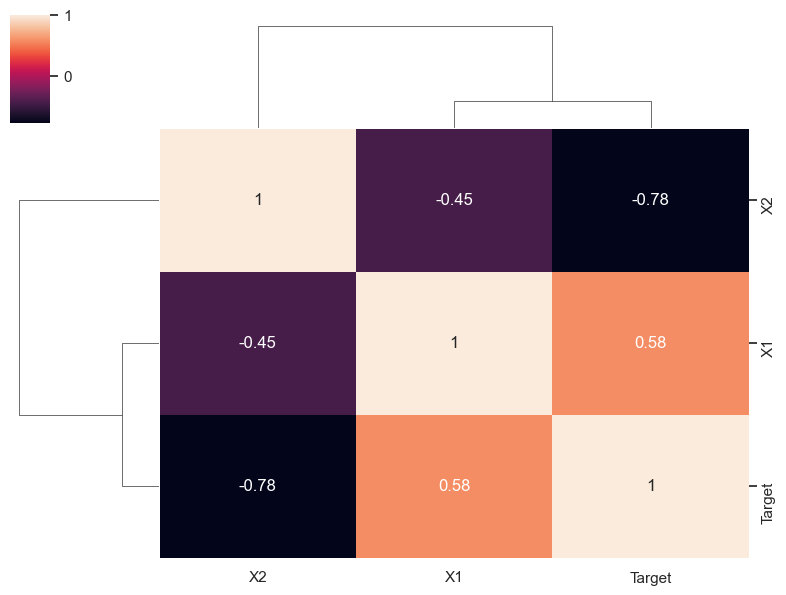

In [12]:
sns.clustermap(df.corr(), annot=True, figsize=(8, 6))
plt.show()

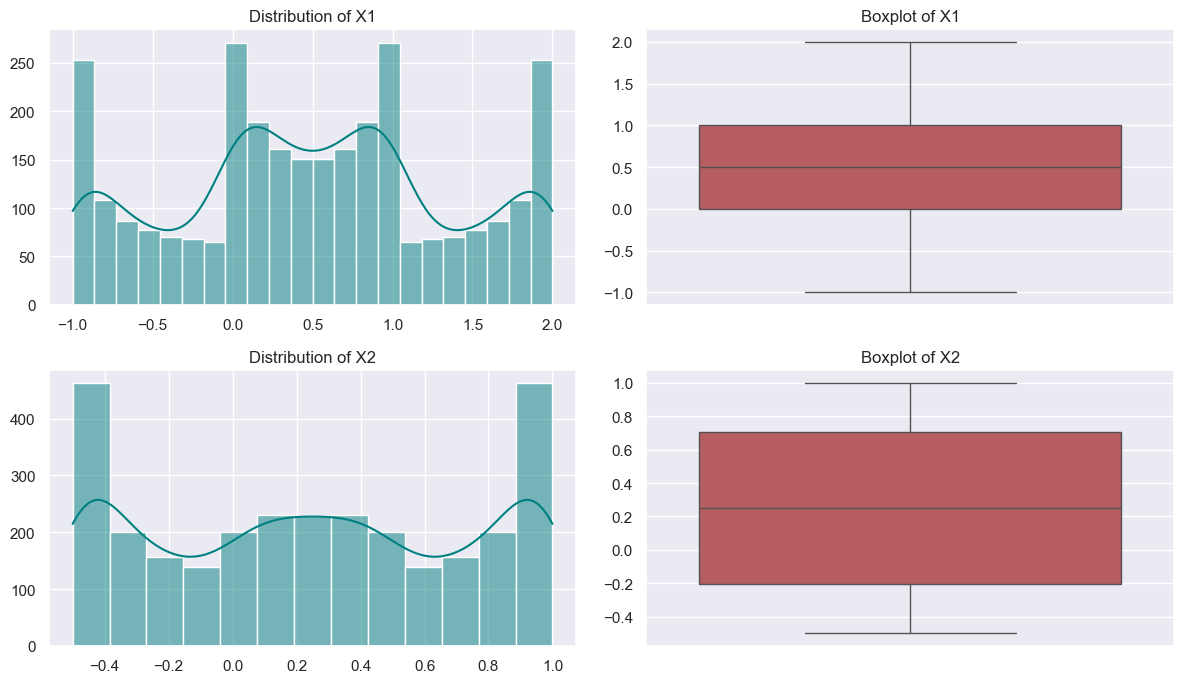

In [13]:
features = ['X1','X2']

plt.figure(figsize=(12, len(features) * 3.5))

for i, col in enumerate(features):
    plt.subplot(len(features), 2, i * 2 + 1)
    sns.histplot(df[col], kde=True, color='teal')
    plt.title(f"Distribution of {col}")
    plt.xlabel('')  
    plt.ylabel('')

    plt.subplot(len(features), 2, i * 2 + 2)
    sns.boxplot(y=df[col], color='r')
    plt.title(f"Boxplot of {col}")
    plt.xlabel('')
    plt.ylabel('')

plt.tight_layout()
plt.show()

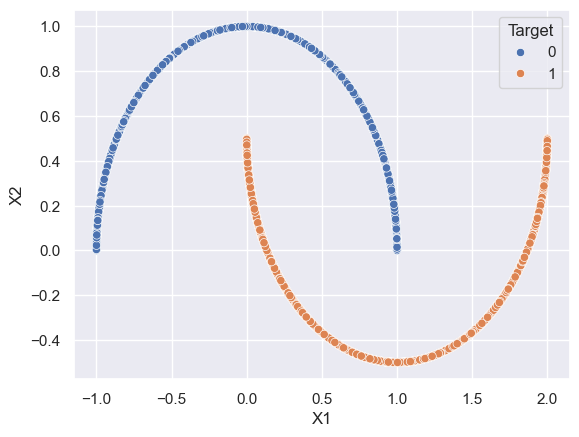

In [14]:
sns.scatterplot(data=df, x='X1',y='X2', hue='Target')
plt.show()

In [15]:
df['Target'].value_counts()

Target
0    1500
1    1500
Name: count, dtype: int64

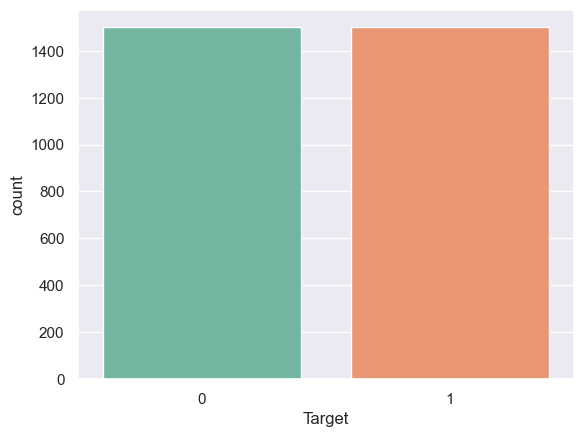

In [16]:
sns.countplot(data = df, x='Target', palette='Set2')
plt.show()

### **Data Preprocessing**

#### **Splitting Data into Training and Testing Sets**

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [18]:
print('X_train shape is: ', X_train.shape)
print('X_test shape is: ', X_test.shape)
print('y_train shape is: ', y_train.shape)
print('y_test shape is: ', y_test.shape)

X_train shape is:  (2400, 2)
X_test shape is:  (600, 2)
y_train shape is:  (2400,)
y_test shape is:  (600,)


### **XGBoost from Scratch**

In [19]:
class SimpleDecisionTree:
    def __init__(self, max_depth=1):
        self.max_depth = max_depth
        self.feature_index = None
        self.threshold = None
        self.left_value = None
        self.right_value = None

    def fit(self, X, grad):
        m, n = X.shape
        best_loss = float('inf')
        
        
        for j in range(n):
            thresholds = np.unique(X[:, j])
            for t in thresholds:
                left_mask = X[:, j] <= t
                right_mask = ~left_mask

                if left_mask.sum() == 0 or right_mask.sum() == 0:
                    continue

                left_val = grad[left_mask].mean()
                right_val = grad[right_mask].mean()

                
                loss = ((grad[left_mask] - left_val)**2).sum() + ((grad[right_mask] - right_val)**2).sum()

                if loss < best_loss:
                    best_loss = loss
                    self.feature_index = j
                    self.threshold = t
                    self.left_value = left_val
                    self.right_value = right_val

    def predict(self, x):
        if x[self.feature_index] <= self.threshold:
            return self.left_value
        else:
            return self.right_value


def softmax(logits):
    exp_logits = np.exp(logits - np.max(logits, axis=1, keepdims=True))
    return exp_logits / np.sum(exp_logits, axis=1, keepdims=True)


class XGBoostScratch:
    def __init__(self, n_rounds=10, lr=0.3):
        self.n_rounds = n_rounds
        self.lr = lr
        self.trees = []
        self.classes_ = None

    def fit(self, X, y):
        self.classes_ = np.unique(y)
        K = len(self.classes_)

        y_onehot = np.eye(K)[y]
        logits = np.zeros((X.shape[0], K))

        self.trees = [[] for _ in range(K)]

        for _ in range(self.n_rounds):
            probs = softmax(logits)

            for k in range(K):
                grad = probs[:, k] - y_onehot[:, k]   
                tree = SimpleDecisionTree(max_depth=1)
                tree.fit(X, grad)
                update = np.array([tree.predict(x) for x in X])

                logits[:, k] -= self.lr * update
                self.trees[k].append(tree)

    def predict(self, X):
        logits = np.zeros((X.shape[0], len(self.classes_)))
        for k, trees in enumerate(self.trees):
            for tree in trees:
                logits[:, k] -= self.lr * np.array([tree.predict(x) for x in X])
        probs = softmax(logits)
        return np.argmax(probs, axis=1)

#### **Evaluation Metrics from Scratch**

In [20]:
def confusion_matrix(y_true, y_pred):
    classes = np.unique(np.concatenate([y_true, y_pred]))
    matrix = np.zeros((len(classes), len(classes)), dtype=int)
    for true, pred in zip(y_true, y_pred):
        matrix[true][pred] += 1
    return matrix, classes


def accuracy_score(y_true, y_pred):
    return np.mean(y_true == y_pred)


def precision_recall_f1(cm):
    n_classes = cm.shape[0]
    precision = []
    recall = []
    f1 = []

    for i in range(n_classes):
        TP = cm[i, i]
        FP = cm[:, i].sum() - TP
        FN = cm[i, :].sum() - TP

        prec = TP / (TP + FP) if (TP + FP) > 0 else 0
        rec  = TP / (TP + FN) if (TP + FN) > 0 else 0
        f1_i = 2 * prec * rec / (prec + rec) if (prec + rec) > 0 else 0

        precision.append(prec)
        recall.append(rec)
        f1.append(f1_i)

    return precision, recall, f1


def classification_report(y_true, y_pred):
    cm, classes = confusion_matrix(y_true, y_pred)

    report = "Class | Precision | Recall | F1-score | Support\n"
    report += "-"*50 + "\n"

    precisions, recalls, f1s, supports = [], [], [], []

    for i, cls in enumerate(classes):
        tp = cm[i, i]
        fp = cm[:, i].sum() - tp
        fn = cm[i, :].sum() - tp

        precision = tp / (tp + fp) if (tp + fp) > 0 else 0
        recall = tp / (tp + fn) if (tp + fn) > 0 else 0
        f1 = (2 * precision * recall / (precision + recall)) if (precision + recall) > 0 else 0
        support = cm[i, :].sum()

        precisions.append(precision)
        recalls.append(recall)
        f1s.append(f1)
        supports.append(support)

        report += f"{cls:5d} | {precision:9.2f} | {recall:6.2f} | {f1:8.2f} | {support:7d}\n"

    report += "-"*50 + "\n"
    report += f"Macro Avg | {np.mean(precisions):9.2f} | {np.mean(recalls):6.2f} | {np.mean(f1s):8.2f} | {np.sum(supports):7d}\n"

    return report

In [21]:
model_names = []
accuracy_result = []
precision_result = []
recall_result = []
f1_result = []


def evaluate_model(name, model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    cm, classes = confusion_matrix(y_test, y_pred)
    acc = accuracy_score(y_test, y_pred)
    prec, rec, f1 = precision_recall_f1(cm)

    model_names.append(name)
    accuracy_result.append(acc)
    precision_result.append(np.mean(prec))
    recall_result.append(np.mean(rec))
    f1_result.append(np.mean(f1))

    print(f"----- {name} -----")
    print("Accuracy:", acc)
    print("Precision:", np.mean(prec))
    print("Recall:", np.mean(rec))
    print("F1-score:", np.mean(f1))
    print("\nClassification Report:\n", classification_report(y_test, y_pred))

    print("\nConfusion Matrix:\n", cm)

    plt.figure(figsize=(5,4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=classes, yticklabels=classes)
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.title(f"Confusion Matrix - {name}")
    plt.show()

#### **Training and Evaluating Models**

In [22]:
model = XGBoostScratch(n_rounds=20, lr=0.3)

----- XGBoost -----
Accuracy: 0.92
Precision: 0.9287833827893175
Recall: 0.9228295819935691
F1-score: 0.9198494951631397

Classification Report:
 Class | Precision | Recall | F1-score | Support
--------------------------------------------------
    0 |      0.86 |   1.00 |     0.92 |     289
    1 |      1.00 |   0.85 |     0.92 |     311
--------------------------------------------------
Macro Avg |      0.93 |   0.92 |     0.92 |     600


Confusion Matrix:
 [[289   0]
 [ 48 263]]


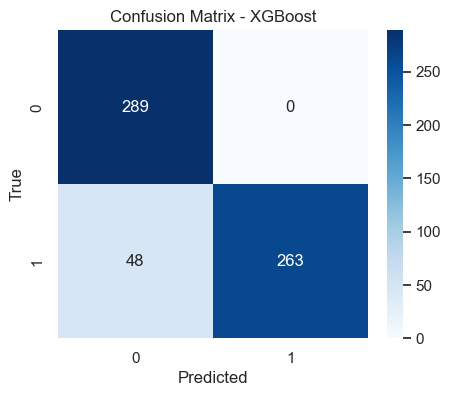

In [23]:
evaluate_model('XGBoost', model, X_train, X_test, y_train, y_test)

#### **Export Model and Preprocessing Pipeline**

In [25]:
joblib.dump(model, 'XGBoost.pkl')

['XGBoost.pkl']

## **Final Thoughts**

This project demonstrated the complete journey of **building, evaluating, and deploying XGBoost from scratch** on the challenging **Make Moons dataset**.  
By coding the **core mechanics of gradient boosting and decision trees** without relying on external libraries, the project provided deeper insight into how boosting iteratively improves weak learners to form a strong classifier.  

All evaluation metrics—**accuracy, precision, recall, F1-score, confusion matrix, and classification report**—were also implemented from scratch, reinforcing the understanding of how performance is measured beyond simple accuracy.  
The custom-built XGBoost model achieved strong results, with an overall **accuracy of 92%**, balancing both precision and recall effectively.  

To make the project engaging and interactive, the model was deployed as a **Streamlit web application**, where features and target classes were renamed playfully (🌌 Moon Position, ✨ Moon Glow, 🌝 Happy Moon, 🌚 Sad Moon). This makes the technical achievement accessible in a fun and creative way.  

---

**Thank you for exploring this project.**
